# Holiday packages dataset  🎒✈️

Dataset from [Kaggle](https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction).

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv('Travel.csv')

In [76]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [77]:
df.Gender.value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

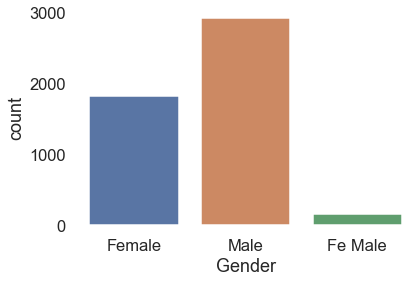

In [78]:
sns.countplot(x = "Gender", data = df)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

Not sure what Fe Male is, so delete that from df.

In [79]:
df = df.loc[(df['Gender']!="Fe Male")]

In [80]:
df.Gender.value_counts()

Male      2916
Female    1817
Name: Gender, dtype: int64

Let's also change the Gender labels

In [81]:
df['Gender'] = df.Gender.replace({'Female': "Women", 'Male': 'Men'})

## Who travels more?

In [82]:
pd.pivot_table(data = df, index = 'Occupation',
              columns = ['MaritalStatus', 'Gender'],
               values = 'NumberOfTrips',
              aggfunc = 'mean')

MaritalStatus   Divorced             Married              Single            \
Gender               Men     Women       Men     Women       Men     Women   
Occupation                                                                   
Free Lancer          NaN       NaN       NaN       NaN  7.500000       NaN   
Large Business  3.851064  2.555556  3.643478  3.038462  4.392857  2.729730   
Salaried        3.348485  2.943182  3.303965  3.280098  2.801762  3.055276   
Small Business  2.982456  3.689024  3.247475  3.408269  2.867841  2.594203   

MaritalStatus  Unmarried            
Gender               Men     Women  
Occupation                          
Free Lancer          NaN       NaN  
Large Business  3.277778  3.928571  
Salaried        3.293532  3.269231  
Small Business  3.133803  3.220339

I'm just cheking here if this pivot table is doing what I want: getting the average number of trips per group

In [83]:
df_divorced_women = df[(df.Gender == 'Women') &
                     (df.MaritalStatus == 'Divorced') & 
                     (df.Occupation == 'Large Business')]
df_divorced_women.NumberOfTrips.mean()

2.5555555555555554

In [84]:
df_single_men = df[(df.Gender == 'Men') &
                     (df.MaritalStatus == 'Single') & 
                     (df.Occupation == 'Large Business')]
df_single_men.NumberOfTrips.mean()

4.392857142857143

Why NaN? 

In [85]:
df.loc[(df['Occupation']=="Free Lancer")]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Men,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
2446,202446,1,38.0,Self Enquiry,1,9.0,Free Lancer,Men,4,5.0,Basic,3.0,Single,8.0,1,3,0,1.0,Executive,20768.0


Because there are only two Freelancers in the dataset and they are Male!!

I'll now create a dataset with the columns of interest to answer my question

In [86]:
question1 = df[['Gender', 'Occupation', 'MaritalStatus', 'NumberOfTrips']]

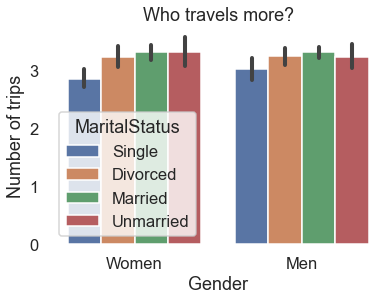

In [87]:
sns.barplot(x="Gender", y="NumberOfTrips",
            hue = 'MaritalStatus',
             data=question1).set(title='Who travels more?',
                          xlabel = 'Gender', ylabel = 'Number of trips')
for spine in plt.gca().spines.values():
    spine.set_visible(False)

It looks like Single people travel a bit less...

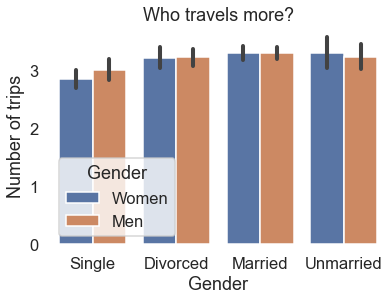

In [88]:
sns.barplot(x='MaritalStatus', y="NumberOfTrips",
            hue = 'Gender',
             data=question1).set(title='Who travels more?',
                          xlabel = 'Gender', ylabel = 'Number of trips')
for spine in plt.gca().spines.values():
    spine.set_visible(False)

especially single women travel less...

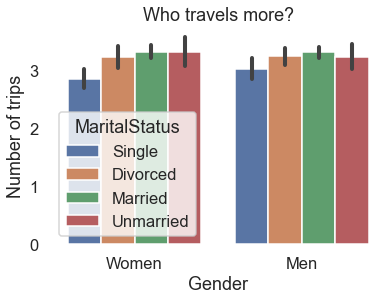

In [89]:
sns.barplot(x='Gender', y="NumberOfTrips",
            hue = 'MaritalStatus',
             data=question1).set(title='Who travels more?',
                          xlabel = 'Gender', ylabel = 'Number of trips')
for spine in plt.gca().spines.values():
    spine.set_visible(False)

we only have data for 2 freelancers, let's check how many datapoints we have for the other occupations...

In [90]:
question1.Occupation.value_counts()

Salaried          2303
Small Business    2007
Large Business     421
Free Lancer          2
Name: Occupation, dtype: int64

Ok, so I think it's best if we remove the 2 freelancers

In [91]:
question1 = question1.loc[(df['Occupation']!="Free Lancer")]

something is not adding up - the pivot table above tells us that single men travel more in average...whereas the plot tells us tha single people travel less..what's going on?
well, that was specific for Large Businesses...

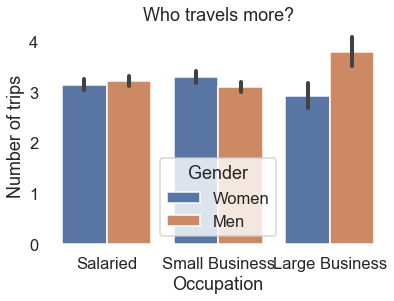

In [92]:
sns.barplot(x='Occupation', y="NumberOfTrips",
            hue = 'Gender',
             data=question1).set(title='Who travels more?',
                          xlabel = 'Occupation', ylabel = 'Number of trips')
for spine in plt.gca().spines.values():
    spine.set_visible(False)

so I'll join Marital Status with Gender in a column and look at that by Occupation.

In [93]:
question1['GenderMaritalStatus'] = question1.MaritalStatus.str.cat(question1.Gender, sep = ' ')
question1 = question1[['Occupation','GenderMaritalStatus', 'NumberOfTrips']]
question1.head()

,Occupation,GenderMaritalStatus,NumberOfTrips
0,Salaried,Single Women,1.0
1,Salaried,Divorced Men,2.0
3,Salaried,Divorced Women,2.0
4,Small Business,Divorced Men,1.0
5,Salaried,Single Men,1.0


In [94]:
grouped = question1.groupby(['GenderMaritalStatus', 'Occupation']).mean()
grouped.sort_values('NumberOfTrips', ascending = False)

,,NumberOfTrips
GenderMaritalStatus,Occupation,
Single Men,Large Business,4.392857
Unmarried Women,Large Business,3.928571
Divorced Men,Large Business,3.851064
Divorced Women,Small Business,3.689024
Married Men,Large Business,3.643478
Married Women,Small Business,3.408269
Divorced Men,Salaried,3.348485
Married Men,Salaried,3.303965
Unmarried Men,Salaried,3.293532


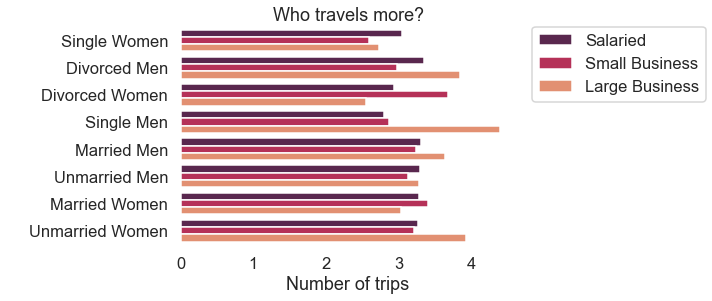

In [95]:
sns.set_theme(style="white", context="talk")
sns.barplot(x="NumberOfTrips" , y='GenderMaritalStatus',
            hue = 'Occupation',
             data=question1,
           palette="rocket",
           ci=None).set(title='Who travels more?',
                          xlabel = 'Number of trips', ylabel = ' ')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

Our answer to who travels more: Single men that work in Large Businesses!

In [96]:
df.to_excel("travel-clean-data.xlsx") 

You can find a Tableau interactive visualisation I created [here](https://public.tableau.com/app/profile/bruna.tessaro2596/viz/whotravelsmore/Dashboard1?publish=yes).